In [394]:
import numpy as np
import matplotlib.pyplot as plt

In [395]:
def gaussian_generator(m, var):
    temp = np.sum(np.random.uniform(0,1,12))-6
    return m + temp*np.sqrt(var)

In [396]:
def get_input():
    N = int(input("Number of data points: "))
    mx1 = float(input("mx1: "))
    vx1 = float(input("vx1: ")) 
    my1 = float(input("my1: "))
    vy1 = float(input("vy1: ")) 
    mx2 = float(input("mx2: "))
    vx2 = float(input("vx2: ")) 
    my2 = float(input("my2: "))
    vy2 = float(input("vy2: ")) 
    return N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2

In [397]:
def print_result(w):
    print("w:")
    for i in w:
        print('{:13.10f}'.format(i))
        
    print("\nConfusion Matrix:") 
    print("             Predict cluster 1 Predict cluster 2")
    print("Is cluster 1        {}                {}".format(np.sum(np.dot(D1,np.transpose(w))<0),np.sum(np.dot(D1,np.transpose(w))>0)))
    print("Is cluster 2        {}                {}".format(np.sum(np.dot(D2,np.transpose(w))<0),np.sum(np.dot(D2,np.transpose(w))>0)))
    print("\nSensitivity (Successfully predict cluster 1): {:.5f}".format(np.sum(np.dot(D1,np.transpose(w))<0)/N))
    print("Specificity (Successfully predict cluster 2): {:.5f}".format(np.sum(np.dot(D2,np.transpose(w))>0)/N))
    print("\n----------------------------------------------------")
    

In [412]:
N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2 = get_input()

Number of data points: 50
mx1: 2
vx1: 4
my1: 2
vy1: 4
mx2: 3
vx2: 1
my2: 3
vy2: 1


In [413]:
D1 = []
D2 = []
for i in range(N):
    D1.append([gaussian_generator(mx1,vx1),gaussian_generator(my1,vy1),1])
    D2.append([gaussian_generator(mx2,vx2),gaussian_generator(my2,vy2),1])
D1 = np.array(D1)
D2 = np.array(D2)
X = np.concatenate((D1,D2),axis=0)
X_transpose = np.transpose(X)
label = np.append(np.array([0 for i in range(N)]),np.array([1 for i in range(N)]))

In [414]:
# Gradient decent
# initial w to any number
w_transpose = np.array([0,0,0])
while(1):
    gradient = np.dot(X_transpose,1/(1+np.exp(-np.dot(w_transpose,X_transpose)))-label)
    w_new = w_transpose - 0.001*gradient # 0.001 for steepest descent
    # converge
    if(np.linalg.norm(w_new-w_transpose)<0.0001):
        w_gradient = w_new
        break
    w_transpose = w_new

In [415]:
print("Gradient decent: \n")
print_result(w_gradient)

Gradient decent: 

w:
 0.3588114584
 0.6112780945
-2.6400760602

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        33                17
Is cluster 2        15                35

Sensitivity (Successfully predict cluster 1): 0.66000
Specificity (Successfully predict cluster 2): 0.70000

----------------------------------------------------


In [416]:
#Newton's method
# initial w to any number
w_transpose = np.array([0,0,0])
D = np.zeros((2*N,2*N))
while(1):
    for i in range(2*N):
        D[i][i] = np.exp(-np.dot(X[i],w_transpose))/(1+np.exp(-np.dot(X[i],w_transpose)))**2
    gradient = np.dot(X_transpose,1/(1+np.exp(-np.dot(w_transpose,X_transpose)))-label)
    hessian = np.dot(X_transpose,np.dot(D,X))
    if (np.linalg.det(hessian)==0):
        w_new = w_transpose - 0.001*gradient # 0.001 for steepest descent
    else:
        w_new = w_transpose - np.dot(np.linalg.inv(hessian),gradient)
        
    # converge
    if(np.linalg.norm(w_new-w_transpose)<0.001):
        w_newton = w_new
        break
    w_transpose = w_new

In [417]:
print("Newton\'s method: \n")
print_result(w_newton)

Newton's method: 

w:
 0.3661230537
 0.6219678130
-2.6955171629

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        33                17
Is cluster 2        15                35

Sensitivity (Successfully predict cluster 1): 0.66000
Specificity (Successfully predict cluster 2): 0.70000

----------------------------------------------------


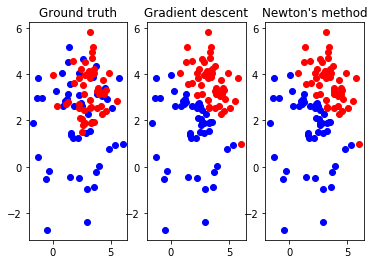

In [418]:
plt.subplot(131)
plt.title("Ground truth")
plt.plot(D1[:,0],D1[:,1],'bo')
plt.plot(D2[:,0],D2[:,1],'ro')

plt.subplot(132)
plt.title("Gradient descent")
c1=[]
c2=[]
for i in X:
    if(np.dot(i,np.transpose(w_gradient))<0):
        c1.append(i)
    else:
        c2.append(i)
c1 = np.array(c1)
c2 = np.array(c2)
plt.plot(c1[:,0],c1[:,1],'bo')
plt.plot(c2[:,0],c2[:,1],'ro')
        
plt.subplot(133)
plt.title("Newton\'s method")
c1=[]
c2=[]
for i in X:
    if(np.dot(i,np.transpose(w_newton))<0):
        c1.append(i)
    else:
        c2.append(i)
c1 = np.array(c1)
c2 = np.array(c2)
plt.plot(c1[:,0],c1[:,1],'bo')
plt.plot(c2[:,0],c2[:,1],'ro')